In [1]:
#import dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.stats import chi2_contingency
heart = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
heart

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [2]:
heart["BMI"].max()

98.0

reference article  

https://towardsdatascience.com/entropy-and-information-gain-in-decision-trees-c7db67a3a293

In [3]:
def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            # use log from math and set base to 2
            entropy += prob * math.log(prob, 2)
    
    return -entropy

In [4]:
def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    #Find the unique values in the column
    values = data[split_name].unique()
    
    
    # Make two subsets of the data, based on the unique values
    left_split = data[data[split_name] == values[0]]
    right_split = data[data[split_name] == values[1]]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

In [5]:
def highest_info_gain(columns):
  #Intialize an empty dictionary for information gains
  information_gains = {}
  
  #Iterate through each column name in our list
  for col in columns:
    #Find the information gain for the column
    information_gain = calc_information_gain(heart, col, "HeartDiseaseorAttack")
    #Add the information gain to our dictionary using the column name as the ekey                                         
    information_gains[col] = information_gain
  
  #Return the key with the highest value                                          
  return max(information_gains, key=information_gains.get)

In [6]:
#convert BMI into categorical variable
heart['BMI']=pd.cut(heart.BMI,bins=[0,18.5,24.9,29.9,99],labels=['underweight','healthy','overweight','obesity']
      )

In [7]:
#factorize the column
heart['BMI'] = pd.factorize(heart['BMI'])[0]

In [8]:
heart.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                       int64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [9]:
columns = ['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','Diabetes','PhysActivity',
          'Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth',
          'PhysHlth','DiffWalk','Sex','Age','Education','Income']

In [10]:
highest_info_gain(columns)

'Income'

In [11]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Reference for creating and visualing the decision tree:
https://medium.com/chinmaygaikwad/build-and-visualize-a-simple-decision-tree-using-sklearn-and-graphviz-84bda6b6b894

In [12]:
#Splitting into testing and training
# Putting feature variable to X
X = heart.drop('HeartDiseaseorAttack',axis=1)

# Putting response variable to y
y = heart['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train.shape, X_test.shape

((202944, 21), (50736, 21))

In [13]:
#plot the decision tree to check
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

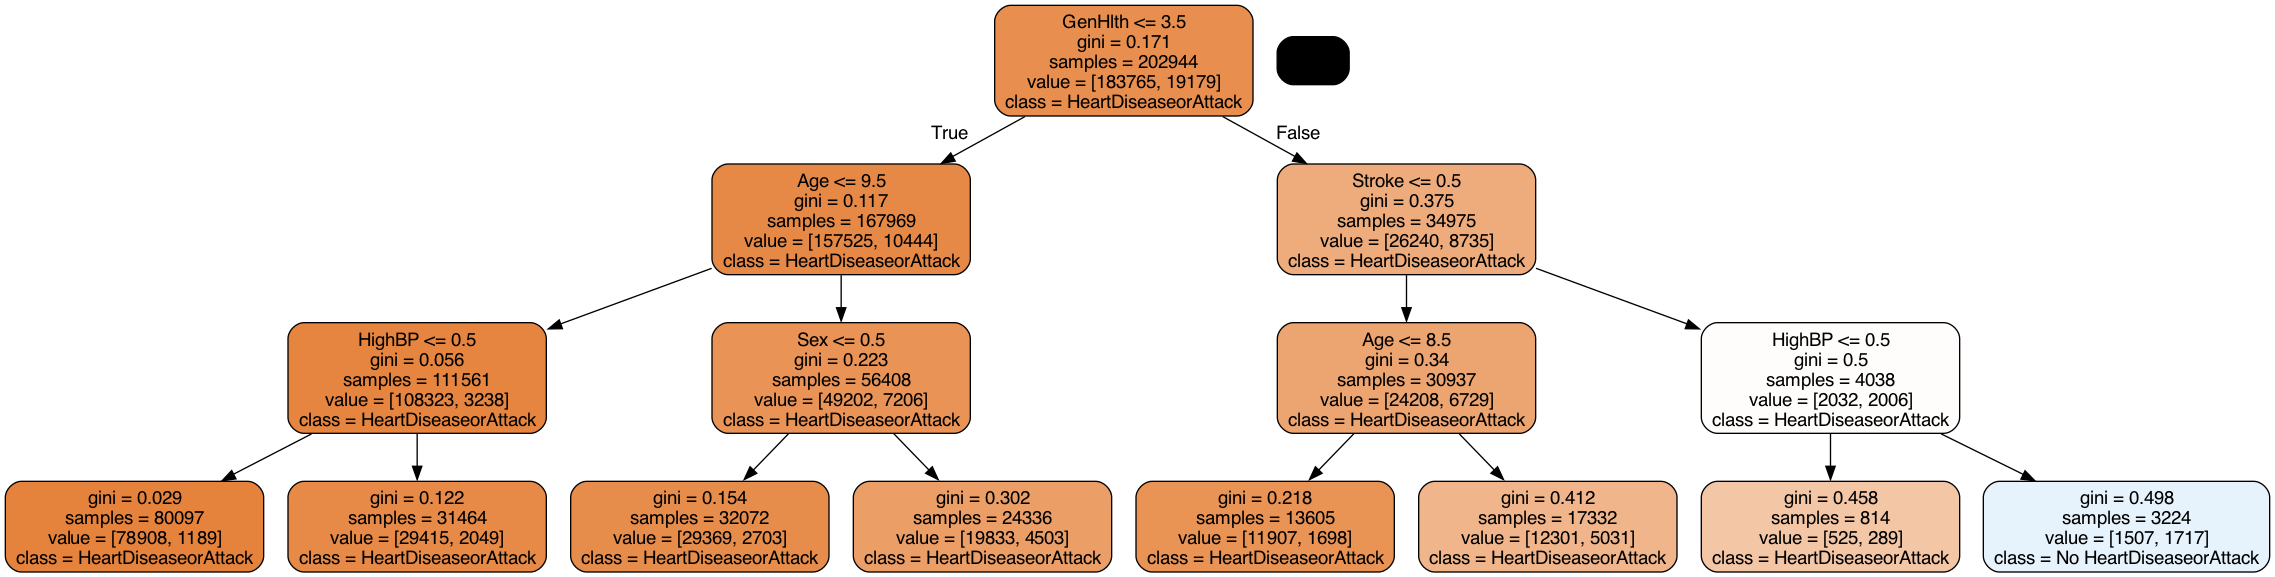

In [15]:
# plotting tree
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['HeartDiseaseorAttack', "No HeartDiseaseorAttack"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [18]:
# overall accuracy of model
trainaccuracy= accuracy_score(y_train, y_train_pred)
testaccuracy= accuracy_score(y_test, y_test_pred)

confusion_TRN = confusion_matrix(y_train, y_train_pred)
confusion_TST = confusion_matrix(y_test, y_test_pred)

In [19]:
TP = confusion_TRN[1,1] # true positive 
TN = confusion_TRN[0,0] # true negatives
FP = confusion_TRN[0,1] # false positives
FN = confusion_TRN[1,0] # false negatives

TP_TST = confusion_TST[1,1] # true positive 
TN_TST = confusion_TST[0,0] # true negatives
FP_TST = confusion_TST[0,1] # false positives
FN_TST = confusion_TST[1,0] # false negatives

trainsensitivity= TP / float(TP+FN)
trainspecificity= TN / float(TN+FP)

testsensitivity= TP_TST / float(TP_TST+FN_TST)
testspecificity= TN_TST / float(TN_TST+FP_TST)

# Let us compare the values obtained for Train & Test:
print('-'*30)
print('On Train Data')
print('-'*30)
print("Accuracy    : {} %".format(round((trainaccuracy*100),2)))
print("Sensitivity : {} %".format(round((trainsensitivity*100),2)))
print("Specificity : {} %".format(round((trainspecificity*100),2)))
print('-'*30)
print('On Test Data')
print('-'*30)
print("Accuracy    : {} %".format(round((testaccuracy*100),2)))
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))
print('-'*30)

------------------------------
On Train Data
------------------------------
Accuracy    : 90.65 %
Sensitivity : 8.95 %
Specificity : 99.18 %
------------------------------
On Test Data
------------------------------
Accuracy    : 90.68 %
Sensitivity : 7.79 %
Specificity : 99.17 %
------------------------------
